In [3]:
import numpy as np
import keras
import csv
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
import keras.regularizers as regularizers
import matplotlib.pyplot as plt

In [48]:
class BiLSTMTimeseriesDataCheckClassifier():
    
    def __init__(self, hidden_unit, batch_size, epoch, learning_rate, dropout, l2_regularization):
        self.hidden_unit = hidden_unit
        self.batch_size = batch_size
        self.epoch=epoch
        self.learning_rate = learning_rate
        self.dropout = dropout
        self.l2_regularization = l2_regularization
        
        self.model = Sequential()
        lstm = LSTM(units=self.hidden_unit, activation='relu', use_bias=True, dropout=self.dropout, return_sequences=False)
        dense = Dense(units=1, activation='sigmoid',kernel_regularizer=regularizers.l2(self.l2_regularization))
        self.model.add(Bidirectional(lstm, merge_mode='concat'))
        self.model.add(dense)
    
    def fit(self,X, y):
        optimizer=Adam(lr=self.learning_rate)
        self.model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
        return self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epoch)
        
    def score(self,X,y):
        loss, accuracy = self.model.evaluate(X, y)
        return loss, accuracy
    
    def predict(self, X):
        ypredict = self.model.predict(X)
        return ypredict
    
    def fit_plot(self,X, y, validation_split):
        optimizer=Adam(lr=self.learning_rate)
        self.model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
        return self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epoch, validation_split=validation_split) 

In [84]:
data = pd.read_csv("data/CIWL.csv", header=0, sep=",")
rmkt=np.array([s.replace('%' , '') for s in data['Change %'][:20].values]).astype(np.float).reshape(1,20)
data = pd.read_csv("data/USIR.csv", header=0, sep=",")
rf=np.array(data['Price'].values).astype(np.float).reshape(1,20)
beta=np.random.normal(1, 1, (1000,1))
X = np.zeros((1000,20,1))
y = np.zeros(1000, dtype=np.int)

In [85]:
for i in range(1000):
    if np.random.rand()>0.8 and np.random.rand() <=0.9:
        randpos = np.sort(np.random.randint(1,20,2))
        randscale = np.random.rand()*3-1
        X[i][:randpos[0]]=(beta[i]*(rmkt[:,:randpos[0]]-rf[:,:randpos[0]])+rf[:,:randpos[0]]).reshape(randpos[0],1)
        X[i][randpos[0]:randpos[1]]=(randscale*beta[i]*(rmkt[:,randpos[0]:randpos[1]]-rf[:,randpos[0]:randpos[1]])+rf[:,randpos[0]:randpos[1]]).reshape(randpos[1]-randpos[0],1)
        X[i][randpos[1]:]=(beta[i]*(rmkt[:,randpos[1]:]-rf[:,randpos[1]:])+rf[:,randpos[1]:]).reshape(20-randpos[1],1)
        
        y[i]=1
    elif np.random.rand() > 0.9: 
        std = np.std(beta[i]*(rmkt-rf)+rf)
        randpos = np.sort(np.random.randint(1,20,2))
        randscale = np.random.rand(randpos[1]-randpos[0],1)
        X[i][:randpos[0]]=(beta[i]*(rmkt[:,:randpos[0]]-rf[:,:randpos[0]])+rf[:,:randpos[0]]).reshape(randpos[0],1)
        X[i][randpos[0]:randpos[1]]=(beta[i]*(rmkt[:,randpos[0]:randpos[1]]-rf[:,randpos[0]:randpos[1]])+rf[:,randpos[0]:randpos[1]]).reshape(randpos[1]-randpos[0],1)+std*randscale
        X[i][randpos[1]:]=(beta[i]*(rmkt[:,randpos[1]:]-rf[:,randpos[1]:])+rf[:,randpos[1]:]).reshape(20-randpos[1],1)
        
        y[i]=1
    else:
        X[i]=(beta[i]*(rmkt-rf)+rf).reshape(20,1)
        y[i]=0

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.7296 - acc: 0.5637 - val_loss: 0.6458 - val_acc: 0.7750
Epoch 2/100
800/800 [==============================] - 0s 272us/step - loss: 0.6681 - acc: 0.7162 - val_loss: 0.6077 - val_acc: 0.7750
Epoch 3/100
800/800 [==============================] - 0s 266us/step - loss: 0.6423 - acc: 0.7238 - val_loss: 0.5838 - val_acc: 0.7750
Epoch 4/100
800/800 [==============================] - 0s 270us/step - loss: 0.6415 - acc: 0.7238 - val_loss: 0.5698 - val_acc: 0.7750
Epoch 5/100
800/800 [==============================] - 0s 273us/step - loss: 0.6117 - acc: 0.7238 - val_loss: 0.5615 - val_acc: 0.7750
Epoch 6/100
800/800 [==============================] - 0s 265us/step - loss: 0.6139 - acc: 0.7238 - val_loss: 0.5622 - val_acc: 0.7750
Epoch 7/100
800/800 [==============================] - 0s 273us/step - loss: 0.6092 - acc: 0.7238 - val_loss: 0.5609 - val_acc: 0.7700
Epoch 8/100

Epoch 61/100
800/800 [==============================] - 0s 284us/step - loss: 0.4319 - acc: 0.8287 - val_loss: 0.4006 - val_acc: 0.8350
Epoch 62/100
800/800 [==============================] - 0s 275us/step - loss: 0.4440 - acc: 0.8287 - val_loss: 0.4290 - val_acc: 0.8400
Epoch 63/100
800/800 [==============================] - 0s 265us/step - loss: 0.4326 - acc: 0.8325 - val_loss: 0.4181 - val_acc: 0.8350
Epoch 64/100
800/800 [==============================] - 0s 268us/step - loss: 0.4345 - acc: 0.8263 - val_loss: 0.3818 - val_acc: 0.8350
Epoch 65/100
800/800 [==============================] - 0s 254us/step - loss: 0.4345 - acc: 0.8425 - val_loss: 0.3968 - val_acc: 0.8350
Epoch 66/100
800/800 [==============================] - 0s 299us/step - loss: 0.4481 - acc: 0.8188 - val_loss: 0.3938 - val_acc: 0.8450
Epoch 67/100
800/800 [==============================] - 0s 263us/step - loss: 0.4375 - acc: 0.8313 - val_loss: 0.3895 - val_acc: 0.8400
Epoch 68/100
800/800 [==========================

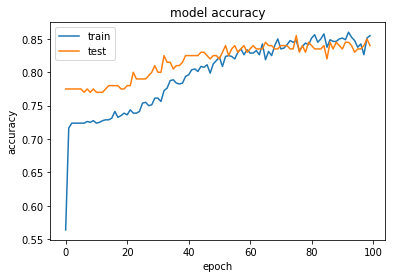

In [86]:
classifier = BiLSTMTimeseriesDataCheckClassifier(hidden_unit=16, batch_size=32, epoch=100, learning_rate=0.001, dropout=0.2, l2_regularization=0.01)
history = classifier.fit_plot(X, y, validation_split=0.2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()